In [1]:
import glob
import zipfile
import tempfile
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import os
import numpy as np
normalize = mcolors.TwoSlopeNorm(vcenter=0, vmin=-1, vmax=1)

max_samples = 30
topn = 50

with tempfile.TemporaryDirectory() as tmpdir:
    print('Decompressing results to', tmpdir)
    with zipfile.ZipFile('results.zip', 'r') as zr:
        zr.extractall(tmpdir)
    dirs = glob.glob(f"{tmpdir}/output/*")
    # Initialize an empty list to store the dataframes
    df_list = []
    df_list_edges = []
    # Iterate over the directories
    for directory in dirs:
        if len(df_list) >= max_samples:
            break
        if os.path.isfile(f"{directory}/sol_nodes.csv"):
            print(f"Loading data from {directory}")
            df = pd.read_csv(f"{directory}/sol_nodes.csv").set_index('nodes')
            df_e = pd.read_csv(f"{directory}/sol_edges.csv").set_index('edges')
            df_list_edges.append(df_e)
            # Append the dataframe to the list
            df_list.append(df)
        else:
            print(f"Skipping {directory}")
# Concatenate all dataframes in the list
final_df = pd.concat(df_list, ignore_index=False, axis=1).dropna()
len(df_list)

Decompressing results to C:\Users\pablo\AppData\Local\Temp\tmpmaq705g0
Loading data from C:\Users\pablo\AppData\Local\Temp\tmpmaq705g0/output\out_573470
Loading data from C:\Users\pablo\AppData\Local\Temp\tmpmaq705g0/output\out_582091
Loading data from C:\Users\pablo\AppData\Local\Temp\tmpmaq705g0/output\out_582092
Loading data from C:\Users\pablo\AppData\Local\Temp\tmpmaq705g0/output\out_582093
Loading data from C:\Users\pablo\AppData\Local\Temp\tmpmaq705g0/output\out_582094
Loading data from C:\Users\pablo\AppData\Local\Temp\tmpmaq705g0/output\out_582095
Loading data from C:\Users\pablo\AppData\Local\Temp\tmpmaq705g0/output\out_582096
Loading data from C:\Users\pablo\AppData\Local\Temp\tmpmaq705g0/output\out_582097
Loading data from C:\Users\pablo\AppData\Local\Temp\tmpmaq705g0/output\out_582099
Loading data from C:\Users\pablo\AppData\Local\Temp\tmpmaq705g0/output\out_582105
Loading data from C:\Users\pablo\AppData\Local\Temp\tmpmaq705g0/output\out_582388
Loading data from C:\Users\

30

In [2]:
def get_drug_gene_values(gene, drug):
    return np.array([df.loc[gene, drug] for df in df_list])

In [3]:
df_avg = pd.DataFrame(df_list[0])
for df in df_list[1:]:
    df_avg += df.loc[df_avg.index, df_avg.columns]
df_avg /= len(df_list)
df_avg

,AEE788,AFATINIB,AZD5363,BAFETINIB,BOSUTINIB,CABOZANTINIB,CEDIRANIB,CRENOLANIB,CRIZOTINIB,DACOMITINIB,...,NILOTINIB,OSIMERTINIB,PONATINIB,QUIZARTINIB,REGORAFENIB,SORAFENIB,SUNITINIB,TIVANTINIB,VANDETANIB,VARLITINIB
nodes,,,,,,,,,,,,,,,,,,,,,
EGLN3,0.0,-0.366667,-0.333333,-0.4,-0.4,0.0,0.000000,-0.366667,0.0,0.0,...,0.0,-0.333333,0.000000,0.0,0.000000,0.0,-0.333333,-0.4,0.000000,0.0
GYPA,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
NGFR,0.0,0.700000,0.000000,0.0,0.0,0.0,0.666667,0.000000,0.0,0.0,...,0.0,0.000000,0.733333,0.7,0.000000,0.0,0.766667,0.0,0.000000,0.0
PSMC3,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
WEE1,0.0,0.033333,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.0,-0.033333,0.0,0.000000,0.0,-0.033333,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
_meas_TIVANTINIB,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,1.0,0.000000,0.0
_pert_VANDETANIB,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,1.000000,0.0
_meas_VANDETANIB,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,1.000000,0.0


In [4]:
df_meas = pd.read_csv('data.tsv', sep='\t')
measured = df_meas.dropna().feature.unique().tolist()
measured = [m for m in measured if not m.startswith('_')]
subset_nodes = [m for m in df_avg.index.difference(measured).tolist() if not m.startswith('_')]
df_avg_pred = df_avg.loc[subset_nodes]
df_out = df_avg_pred[df_avg_pred.abs().sum(axis=1) > 0]
df_out

,AEE788,AFATINIB,AZD5363,BAFETINIB,BOSUTINIB,CABOZANTINIB,CEDIRANIB,CRENOLANIB,CRIZOTINIB,DACOMITINIB,...,NILOTINIB,OSIMERTINIB,PONATINIB,QUIZARTINIB,REGORAFENIB,SORAFENIB,SUNITINIB,TIVANTINIB,VANDETANIB,VARLITINIB
nodes,,,,,,,,,,,,,,,,,,,,,
ACTA1,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
ACTB,0.0,0.000000,0.000000,0.033333,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,-0.033333,0.0,-0.033333,-0.033333,0.033333,-0.033333,0.000000
ACVR1,0.0,0.100000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.100000,0.000000,...,-0.033333,0.100000,0.100000,0.000000,0.0,0.033333,0.000000,0.000000,0.133333,0.000000
ACVR2B,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.033333,0.033333,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,-0.033333
ADAM10,0.0,0.033333,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YWHAQ,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,-0.033333,0.000000,0.000000,0.000000
YWHAZ,0.0,0.000000,0.000000,-0.033333,0.0,0.0,0.0,0.0,0.033333,0.000000,...,0.033333,-0.033333,0.000000,0.000000,0.0,0.000000,-0.033333,-0.033333,0.000000,0.000000
ZAP70,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000


In [5]:
# Sort all nodes (predicted and with measurements) based on the average value
df_avg.abs().mean(axis=1).sort_values(ascending=False).head(20)

nodes
_s        1.000000
_t        1.000000
SMAD3     0.779167
MAX       0.771875
EGR1      0.729167
IRF3      0.708333
ESR1      0.662500
FOXA1     0.659375
ARNT      0.651042
MNT       0.643750
STAT1     0.639583
YAP1      0.639583
JUN       0.610417
RELA      0.605208
CREBBP    0.604167
SMAD4     0.604167
HIF1A     0.602083
SREBF2    0.593750
SOX2      0.592708
TP53      0.588542
dtype: float64

In [6]:
# Same but only predicted nodes (no measured/perturbed)
df_out.abs().mean(axis=1).sort_values(ascending=False).head(20)

nodes
YAP1       0.639583
CREBBP     0.604167
MAPK14     0.530208
CDK1       0.460417
UBE2I      0.442708
GSK3B      0.422917
EP300      0.421875
MAPK3      0.410417
CSNK2A1    0.404167
RB1        0.379167
CIITA      0.366667
KAT2B      0.366667
ITGB4      0.364583
MAPK8      0.331250
CDK2       0.320833
MAPK1      0.319792
PRKACA     0.318750
SMARCA4    0.306250
PPP2CA     0.292708
CSK        0.290625
dtype: float64

In [7]:
df_out.abs().std(axis=1).sort_values(ascending=False).head(30)

nodes
CIITA       0.483120
YAP1        0.433824
SMARCA4     0.410563
HOXD9       0.400090
HMGB1       0.387992
KAT2B       0.381376
STK11       0.380335
PARP1       0.368349
PAK1        0.366115
UBE2I       0.353095
CASP6       0.352956
CTNND1      0.352346
RPS6KB1     0.330389
ATR         0.327797
RB1         0.323373
PPARGC1A    0.317499
MED1        0.313965
NGFR        0.310868
GSK3B       0.302017
MAPK8       0.296205
RHOA        0.290277
NPAT        0.288954
PRKACB      0.287849
EZH2        0.285240
CDK1        0.282264
CSNK2A1     0.277695
CREBBP      0.276920
MAPK14      0.275442
EP300       0.265671
NFIB        0.261644
dtype: float64

In [8]:
df_avg.std(axis=1).sort_values(ascending=False).head(20)

nodes
MAX       0.854751
SMAD3     0.824401
MNT       0.792030
SREBF2    0.777065
IRF3      0.774458
SOX2      0.763210
FOXA1     0.752677
SREBF1    0.751343
YAP1      0.728023
MAZ       0.727555
JUN       0.724977
ETS1      0.718445
CTCF      0.695453
GATA2     0.689592
SMAD4     0.684751
TP53      0.673459
SRF       0.672288
TCF3      0.669564
ATF4      0.666556
CREBBP    0.656423
dtype: float64

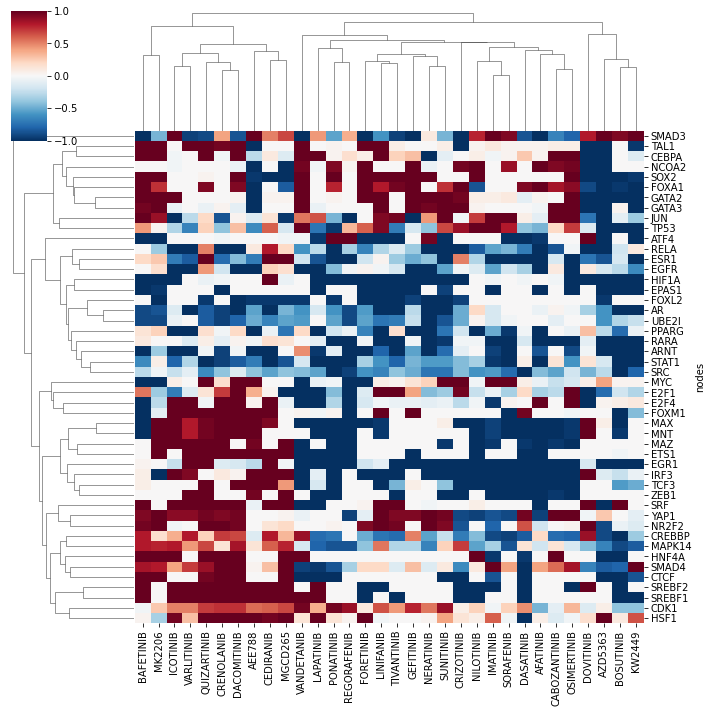

In [9]:
# Plot all nodes, with or without measurements
top_idx = df_avg.abs().mean(axis=1).sort_values(ascending=False).head(topn)
#top_idx = df_avg.std(axis=1).sort_values(ascending=False).head(topn)
top_idx = top_idx[~top_idx.index.str.startswith('_')].index
sns.clustermap(df_avg.loc[top_idx], cmap=cm.RdBu_r, norm=normalize, yticklabels=True)
plt.savefig(f'heatmap_average_node_activity_all_nodes_top{topn}_by_mean.pdf', format='pdf')
plt.savefig(f'heatmap_average_node_activity_all_nodes_top{topn}_by_mean.png', format='png')

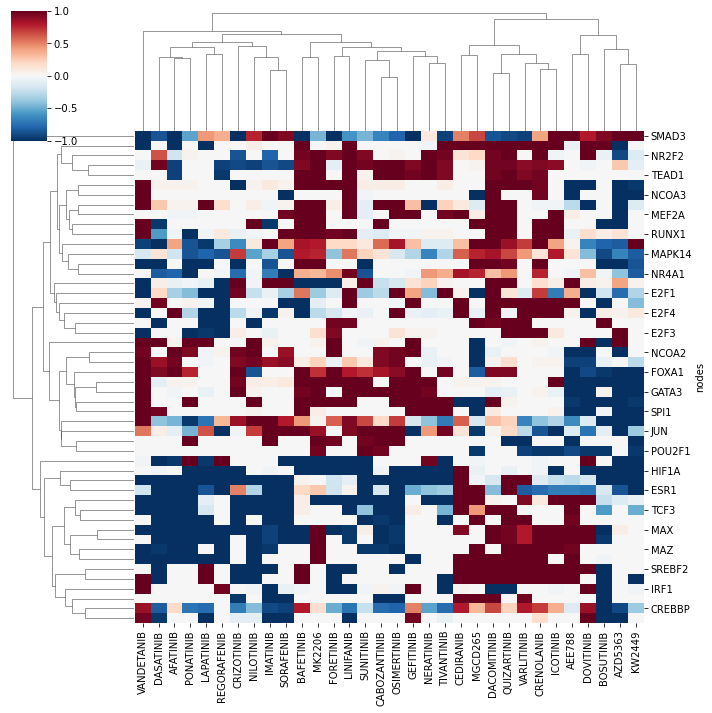

In [10]:
# Plot all nodes, with or without measurements
top_idx = df_avg.std(axis=1).sort_values(ascending=False).head(topn)
top_idx = top_idx[~top_idx.index.str.startswith('_')].index
sns.clustermap(df_avg.loc[top_idx], cmap=cm.RdBu_r, norm=normalize)
plt.savefig(f'heatmap_average_node_activity_all_nodes_top{topn}_by_std.pdf', format='pdf')
plt.savefig(f'heatmap_average_node_activity_all_nodes_top{topn}_by_std.png', format='png')

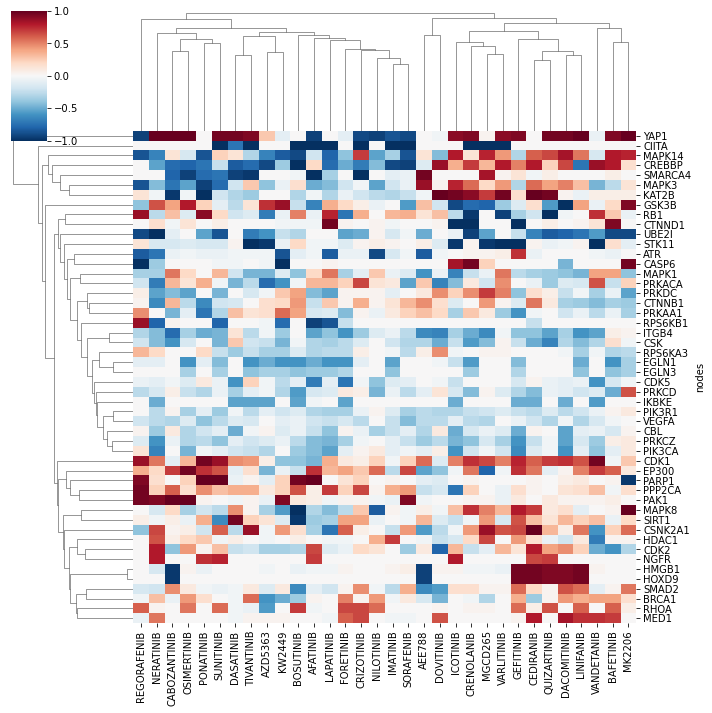

In [11]:
# Plot only predicted nodes with no measurements, sorted by mean
sns.clustermap(df_out.loc[df_out.abs().mean(axis=1).sort_values(ascending=False).head(topn).index], cmap=cm.RdBu_r, norm=normalize, yticklabels=True)
plt.savefig(f'heatmap_average_node_activity_only_predicted_nodes_top{topn}_by_mean.pdf', format='pdf')
plt.savefig(f'heatmap_average_node_activity_only_predicted_nodes_top{topn}_by_mean.png', format='png')

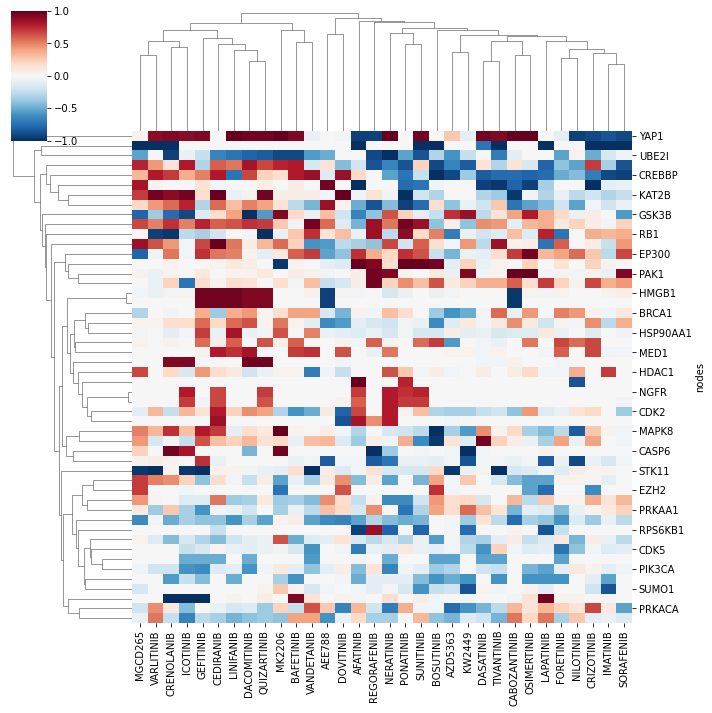

In [12]:
# Plot only predicted nodes with no measurements, sorted by mean
sns.clustermap(df_out.loc[df_out.std(axis=1).sort_values(ascending=False).head(topn).index], cmap=cm.RdBu_r, norm=normalize)
plt.savefig(f'heatmap_average_node_activity_only_predicted_nodes_top{topn}_by_std.pdf', format='pdf')
plt.savefig(f'heatmap_average_node_activity_only_predicted_nodes_top{topn}_by_std.png', format='png')

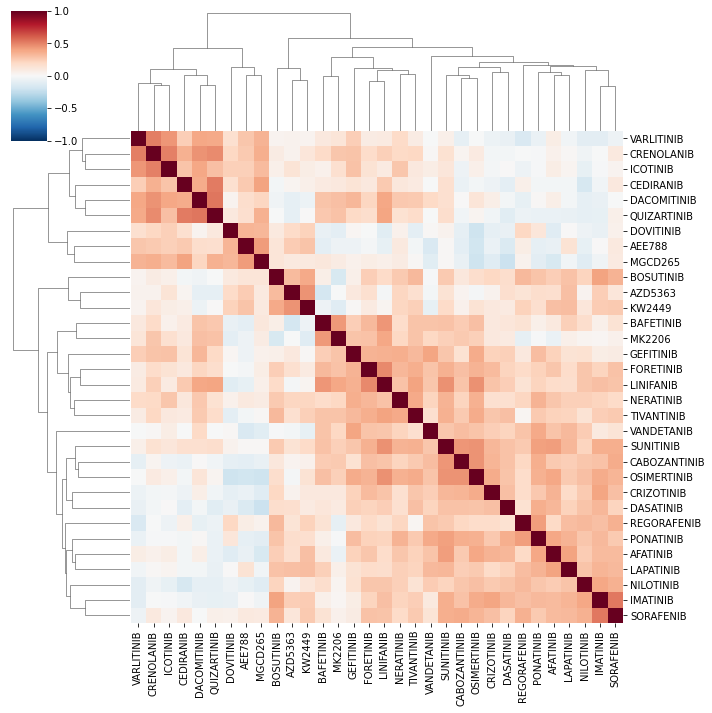

In [13]:
sns.clustermap(df_avg.corr(), cmap=cm.RdBu_r, norm=normalize)
plt.savefig('heatmap_average_drug_corr_all_nodes.pdf', format='pdf')
plt.savefig('heatmap_average_drug_corr_all_nodes.png', format='png')

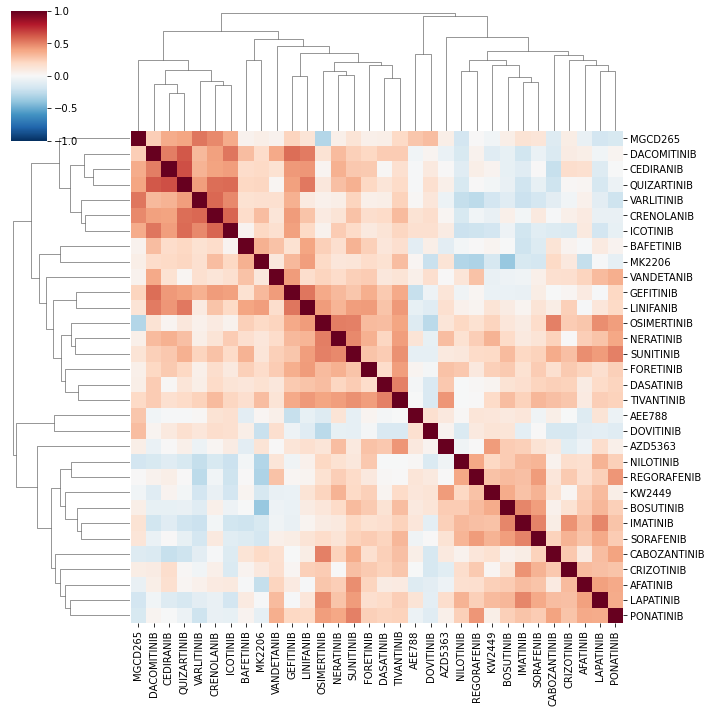

In [14]:
sns.clustermap(df_out.corr(), cmap=cm.RdBu_r, norm=normalize)
plt.savefig('heatmap_average_drug_corr_only_predicted_nodes.pdf', format='pdf')
plt.savefig('heatmap_average_drug_corr_only_predicted_nodes.png', format='png')